* Metodo de clasificación.
* Para variables categóricas.
* Se evalua con matriz de confusión.
<br />
<img src='confusion.png' style='width: 70%'/>
<br />

* Probabilidad de acierto, precisión = (pc + nc) / total
* Probabilida de error, tasa de error = (fp + fn) / total

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [36]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Sobrevivientes por clase

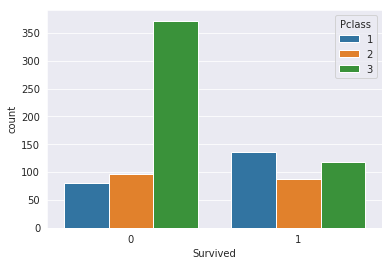

In [9]:
sns.countplot(x='Survived', data=data, hue='Pclass');

### Sobrevivientes por sexo

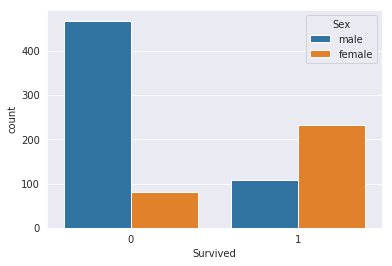

In [10]:
sns.countplot(x='Survived', data=data, hue='Sex')

### Distribución de edades

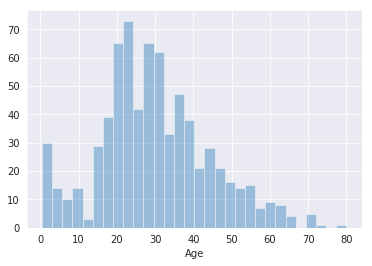

In [15]:
sns.distplot(data['Age'].dropna(), kde=False, bins=30);

In [16]:
import cufflinks as cf
cf.go_offline()

In [32]:
data['Age'].iplot(kind='hist', bins=40);

### Llenamos datos nulos en edad con la edad media para su clase correspondiente

In [27]:
ageMean_firstClass = data[data['Pclass'] == 1]['Age'].mean()
ageMean_secondClass = data[data['Pclass'] == 2]['Age'].mean()
ageMean_thridClass = data[data['Pclass'] == 3]['Age'].mean()
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if  pd.isnull(edad):
        if clase == 1:
            return ageMean_firstClass
        elif clase == 2:
            return ageMean_secondClass
        else:
            return ageMean_thridClass
        
    else:
        return edad

In [37]:
data['Age'] = data[['Age', 'Pclass']].apply(edad_media, axis=1)

In [38]:
# Como la mayoria de valores para "Cabin" son nulos, borramos la columna
data.drop('Cabin', axis=1, inplace=True)

In [39]:
# Limpiemos mas nuetros datos
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Volvamos binaria la columna sex

In [40]:
# 1 si es hombre, 0 si es mujer
data['Sex'] = pd.get_dummies(data['Sex'])['male']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [50]:
puerto = []
for i in data['Embarked']:
    if i == 'S':
        puerto.append(0)
    elif i == 'C':
        puerto.append(1)
    else:
        puerto.append(2)

data['Embarked'] = puerto
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
